In [2]:
using ITensors 
using Plots

In [4]:
function over(L,N,m,G²,sw)
    l = L-1;
    sites = siteinds("Fermion",L)
    ampoₗ = OpSum()
    ampoₛ = OpSum()
    ## Large lattice
    # H0
    for j in 1:L-N
        ampoₗ -= 1im,"C",j,"Cdag",j+N
        ampoₗ += 1im,"C",j+N,"Cdag",j
    end
    # Hg
#     for j in 1:N:L-N
#         ampoₗ += (G²/2),"C * Cdag",j,"C * Cdag",j+1
#     end
    for j in 1:N:L-N
        ampoₗ += (G²/2),"C * Cdag",j#,"C * Cdag",j+1
    end
    # Hm
#     for j in 1:L
#         ampoₗ += (m*(-1)^(div(j+1,N))),"C * Cdag",j
#     end
    for j in 1:L
        ampoₗ += (m*(-1)^j),"C * Cdag",j
    end
    Hₗ = MPO(ampoₗ,sites)
    ψₗ₀ = randomMPS(sites,100)
#     ## small lattice
    for j in 1:l-N
        ampoₛ -= 1im,"C",j,"Cdag",j+N
        ampoₛ += 1im,"C",j+N,"Cdag",j
    end
    for j in 1:N:l-N
        ampoₛ += (G²/2),"C * Cdag",j#,"C * Cdag",j+1
    end
#     for j in 1:l
#         ampoₛ += (m*(-1)^(div(j+1,N))),"C * Cdag",j 
#     end
    for j in 1:l
        ampoₛ += (m*(-1)^j),"C * Cdag",j 
    end
    Hₛ = MPO(ampoₛ,sites[1:l])
    ψₛ₀ = randomMPS(sites[1:l],100)
    
    sweep = Sweeps(sw)
    setmaxdim!(sweep,repeat([100],sw)...)
    setcutoff!(sweep,1E-8)
    
    eₗ₀,ψₗ = dmrg(Hₗ,ψₗ₀,sweep)
    eₛ₀,ψₛ = dmrg(Hₛ,ψₛ₀,sweep)
    
#     #  Overlap computation
    t1 = ITensor(sites[L])
    for j in 1:Int(size(t1)[1])
        t1[j] = 1.0/sqrt(2.0)
#         t1[j] = 1.0/2.0
    end
    v = ITensor(1.0)

    for j in 1:L
        if j <= l
            v = v*dag(ψₛ[j])*ψₗ[j]
        else
            v = v*t1*ψₗ[j]
        end
    end
    return inner(v,v), norm(v)

end
    


over (generic function with 1 method)

In [5]:
# over(L,N,m,G²,sw)
over(4,1,1,1.0,3)

After sweep 1 energy=-2.1480821789984277  maxlinkdim=4 maxerr=2.39E-17 time=41.454
After sweep 2 energy=-2.148131600929151  maxlinkdim=4 maxerr=1.40E-16 time=0.007
After sweep 3 energy=-2.148131601900884  maxlinkdim=4 maxerr=0.00E+00 time=0.006
After sweep 1 energy=-2.1855238760316746  maxlinkdim=2 maxerr=7.79E-17 time=0.006
After sweep 2 energy=-2.1861405924159847  maxlinkdim=2 maxerr=0.00E+00 time=0.006
After sweep 3 energy=-2.1861406616255894  maxlinkdim=2 maxerr=4.16E-17 time=0.006


(0.4172930239052601 + 0.0im, 0.6459822164001576)

In [10]:
result = nothing 
result

In [6]:
# L::Integer, N::Integer,G²::Float64,m::Float64,sw::Integer
result_res = Vector{ComplexF64}()
result_norm = Vector{ComplexF64}()

for j in 4:10
    res , norm_res = over(j,1,1.0,0.4,5); # change BD --> 100
    push!(result_res, res);
    push!(result_norm, norm_res);
end   


After sweep 1 energy=-2.7031597230047244  maxlinkdim=4 maxerr=0.00E+00 time=0.004
After sweep 2 energy=-2.703162603759813  maxlinkdim=4 maxerr=7.80E-17 time=0.006
After sweep 3 energy=-2.7031626037638774  maxlinkdim=4 maxerr=0.00E+00 time=0.007
After sweep 4 energy=-2.7031626037638765  maxlinkdim=4 maxerr=1.08E-16 time=0.006
After sweep 5 energy=-2.703162603763875  maxlinkdim=4 maxerr=1.23E-18 time=0.009
After sweep 1 energy=-2.5116576880308257  maxlinkdim=2 maxerr=0.00E+00 time=0.006
After sweep 2 energy=-2.5121101732984776  maxlinkdim=2 maxerr=2.78E-17 time=0.008
After sweep 3 energy=-2.512110183359166  maxlinkdim=2 maxerr=1.39E-17 time=0.010
After sweep 4 energy=-2.512110183359395  maxlinkdim=2 maxerr=1.39E-17 time=0.007
After sweep 5 energy=-2.512110183359396  maxlinkdim=2 maxerr=0.00E+00 time=0.010
After sweep 1 energy=-3.9925264324332814  maxlinkdim=4 maxerr=1.35E-16 time=0.007
After sweep 2 energy=-3.99256324832046  maxlinkdim=4 maxerr=1.40E-16 time=0.010
After sweep 3 energy=-3

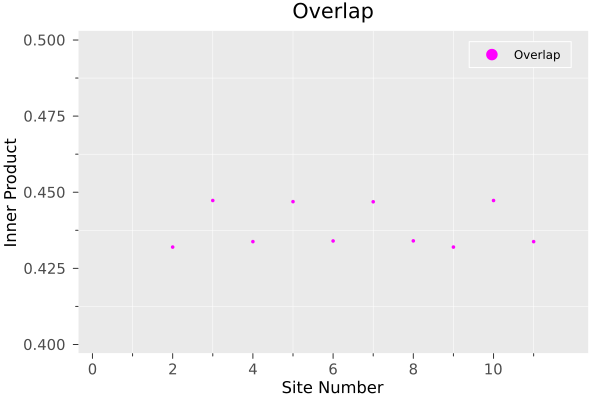

In [11]:
site_number = [x for x in 2:11]
# gr()

result_res = real(result_res)
# result_norm = real(result_norm)
# y = [i for i in 1:length(result_norm)]
# z = [i for i in 1:length(result_norm)]
# theme(:wong)
# theme(:dark)
theme(:ggplot2)

scatter(site_number,result_res ,
        label = "Overlap",
        grid=false,
        dpi = 7000,
        xlim=(0,12),
        ylim=(0.4,0.5),
        xticks=((0:2:11)),
#         yticks=((0.425:0.005:0.450)),
#         xticks=((0:25:100),["0","25","50","75","100"]),
#         yticks=((0:0.1:0.5), ["0","0.1","0.2","0.3","0.4","0.5"]),
        xlabel="Site Number",
        ylabel="Inner Product",
        title="Overlap",
#         color = :fuchsia,
#         color = :lightseagreen,
        color = :magenta,
        marker=:circle,
        markercolor=:fuchsia,
        markersize=2,
        alpha = 1,
        tickfontsize=10)


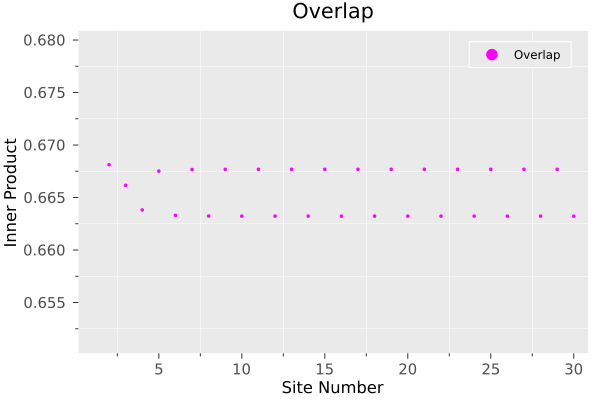

In [37]:
site_number = [x for x in 2:35]
# gr()

result_res = real(result_res)
result_norm = real(result_norm)
# y = [i for i in 1:length(result_norm)]
# z = [i for i in 1:length(result_norm)]
# theme(:wong)
# theme(:dark)
theme(:ggplot2)

scatter(site_number,result_norm ,
        label = "Overlap",
        grid=false,
        dpi = 7000,
        xlim=(1,30),
        ylim=(0.651,0.680),
#         xticks=((0:2:30)),
#         yticks=((0.425:0.005:0.450)),
#         xticks=((0:25:100),["0","25","50","75","100"]),
#         yticks=((0:0.1:0.5), ["0","0.1","0.2","0.3","0.4","0.5"]),
        xlabel="Site Number",
        ylabel="Inner Product",
        title="Overlap",
#         color = :fuchsia,
#         color = :lightseagreen,
        color = :magenta,
        marker=:circle,
        markercolor=:fuchsia,
        markersize=2,
        alpha = 1,
        tickfontsize=10)
